# Laboratorul 4

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

## Exercițiul 1

Prespuneți că într-o incintă temperatura este controlată astfel încât să se obțină o periodicitate noapte-zi asemănătoare unei sinusoide; maximul de temperatură ($1^{\circ} \text{C}$) se atinge la ora 12:00, minimul ($-1^{\circ} \text{C}$) la ora 24:00, nu există variații între zile. Începeți să măsurați temperatura din incintă într-o zi de miercuri, la ora 12:00.

a) Dacă măsurați temperatura la fiecare 2 ore, care va fi **frecvența de eșantionare** (exprimată **în Hz**)?

In [28]:
# Timpul în secunde pentru 2 ore
time_period_sec = 2 * 60 * 60

# Calcularea frecvenței de eșantionare
sampling_frequency = 1 / time_period_sec

print(f"Frecvența de eșantionare este: {sampling_frequency}(1/{time_period_sec}) Hz")


Frecvența de eșantionare este: 0.0001388888888888889(1/7200) Hz


b) Care este **perioada** semnalului de temperatură și care este **frecvența** acestuia? Este eșantionarea din subpunctul precedent **corectă** în sensul teoremei Nyquist? Care este intervalul de perioada maximă la care trebuie măsurată temperatura astfel încât să îndeplinească criteriul de eșantionare Nyquist?

In [29]:
# Perioada semnalului de temperatură în secunde
T_signal = 24 * 60 * 60

# Frecvența semnalului de temperatură
f_signal = 1 / T_signal

# Verificarea criteriului Nyquist
#cred ca puteam sa comparam si perioadele
is_nyquist_satisfied = sampling_frequency >= 2 * f_signal

# Calcularea perioadei maxime de eșantionare pentru a îndeplini Nyquist
T_max = 1 / (2 * f_signal)

print(f"Frecvența semnalului de temperatură este: {f_signal}(1/{T_signal}) Hz")
print(f"Este criteriul Nyquist îndeplinit? {is_nyquist_satisfied}")
print(f"Perioada maximă de eșantionare pentru a îndeplini Nyquist este: {T_max} secunde {T_max / (60*60)} ore")


Frecvența semnalului de temperatură este: 1.1574074074074073e-05(1/86400) Hz
Este criteriul Nyquist îndeplinit? True
Perioada maximă de eșantionare pentru a îndeplini Nyquist este: 43200.0 secunde 12.0 ore


c) Afișați **grafic** cu o curbă sinusoida de temperatură pentru o săptămână și eșantioanele (semnalate grafic prin puncte) obținute cu frecvența de eșantionare de la punctul (a). Afișați conținutul variabilei în care rețineți axa timpului.

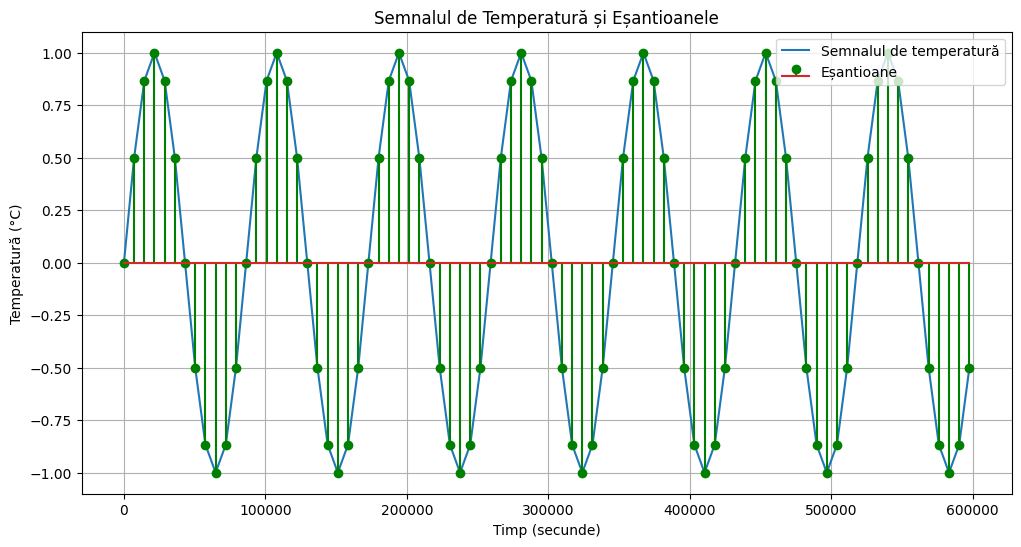

In [30]:
# Parametrii timpului
T_signal = 24 * 60 * 60  # Perioada semnalului în secunde (24 ore)
sampling_period = 2 * 60 * 60  # Perioada de eșantionare în secunde (2 ore)
one_week = 7 * T_signal  # O săptămână în secunde

# Crearea axei timpului
time_axis = np.arange(0, one_week, sampling_period)

# Generarea semnalului de temperatură
temperature_signal = np.sin(2 * np.pi * time_axis / T_signal)

# Afișarea graficului
plt.figure(figsize=(12, 6))
plt.plot(time_axis, temperature_signal, label='Semnalul de temperatură')
plt.stem(time_axis, temperature_signal, 'green', label='Eșantioane')
plt.xlabel('Timp (secunde)')
plt.ylabel('Temperatură (°C)')
plt.title('Semnalul de Temperatură și Eșantioanele')
plt.legend()
plt.grid(True)
plt.show()


d) Dacă măsurați temperatura **o dată la 5 ore**, în ce zi și la ce oră veți obține **din nou** valoarea din primul eșantion (cel de miercuri, ora 12:00)?

In [31]:
T_signal = 86400
T_sample_new = 18000

# Calcularea LCM
# cel mai mic multiplu comun
lcm_value = np.lcm(T_signal, T_sample_new)

# Convertirea LCM în zile și ore
lcm_days = lcm_value // (24 * 60 * 60)
lcm_hours = (lcm_value % (24 * 60 * 60)) // 3600


e) Generați eșantioanele pentru **noua perioadă de eșantionare** (5 ore). Afișați-le pe un nou grafic folosind funcția `plt.plot()`. Ce observați?

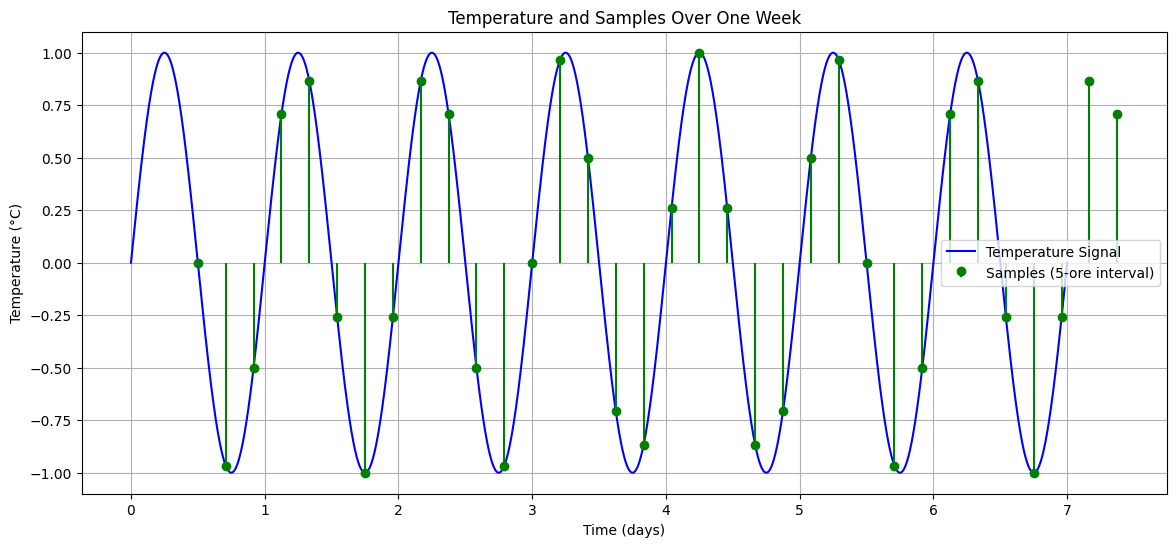

In [33]:
T_day = 86400  
days_in_week = 7   

t_week = np.linspace(0, T_day * days_in_week, 10000)

t_samples = np.arange(12 * 3600, T_day * days_in_week + 12 * 3600, 7200)

t_samples_new = np.arange(12 * 3600, T_day * days_in_week + 12 * 3600, 18000)

f_signal = 1 / 86400

temperature_week = np.sin(2 * np.pi * f_signal * t_week)

temperature_samples = np.sin(2 * np.pi * f_signal * t_samples)

temperature_samples_new = np.sin(2 * np.pi * f_signal * t_samples_new)

plt.figure(figsize=(14, 6))
plt.plot(t_week / T_day, temperature_week, label='Temperature Signal', color='blue')
plt.stem(t_samples_new / T_day, temperature_samples_new, 'g', markerfmt='go', linefmt='g-', basefmt=" ", label='Samples (5-ore interval)')
plt.xlabel('Time (days)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature and Samples Over One Week')
plt.legend()
plt.grid(True)
plt.show()

f) Creați un nou grafic în care afișați eșantioanele generate la subpunctul precedent folosind, de data aceasta, `plt.stem()`. Adăugați pe acest grafic, cu alte culori, sinusoida și eșantioanele de la subpunctul (c).

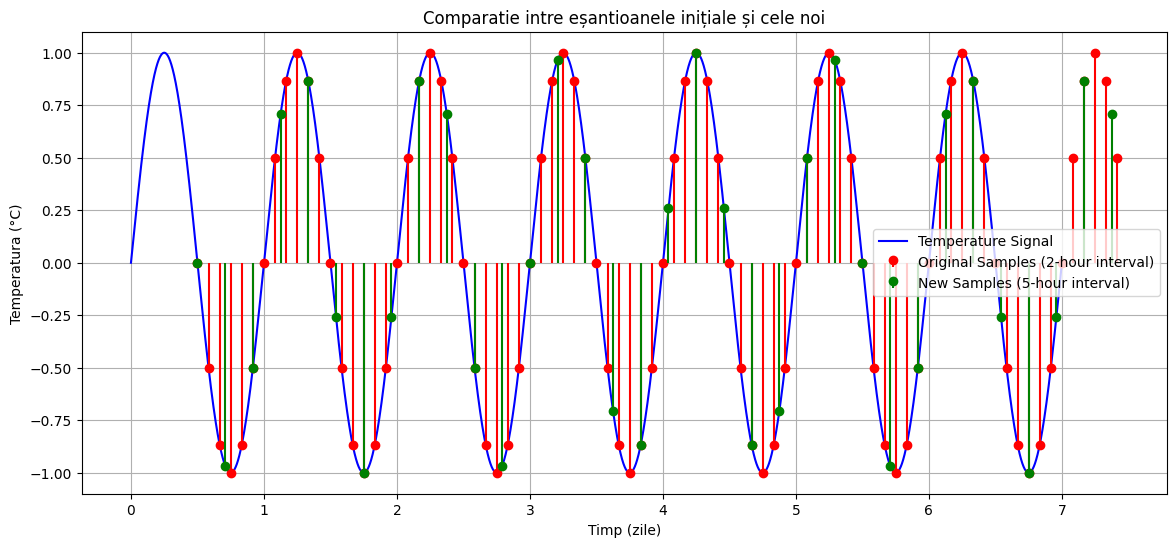

In [34]:
plt.figure(figsize=(14, 6))

plt.plot(t_week / T_day, temperature_week, label='Temperature Signal', color='blue')
plt.stem(t_samples / T_day, temperature_samples, 'r', markerfmt='ro', linefmt='r-', basefmt=" ", label='Original Samples (2-hour interval)')
plt.stem(t_samples_new / T_day, temperature_samples_new, 'g', markerfmt='go', linefmt='g-', basefmt=" ", label='New Samples (5-hour interval)')

plt.xlabel('Timp (zile)')
plt.ylabel('Temperatura (°C)')
plt.title("Comparatie intre eșantioanele inițiale și cele noi")
plt.legend()
plt.grid(True)
plt.show()


## Exercițiul 2

Generați și afișați grafic o sinusoidă de frecvență și fază aleasă de voi, dar ale cărei valori minime și maxime (atinse) să fie 3, respectiv 7.
     

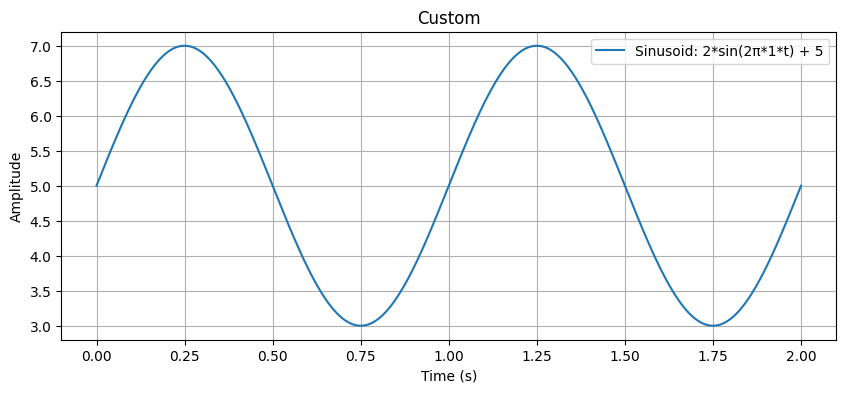

In [41]:
A = 2  
C = 5  # Vertical shift
f_custom = 1  
phi_custom = 0  # faza

t_custom = np.linspace(0, 2, 1000)  # 2 seconds

y_custom = A * np.sin(2 * np.pi * f_custom * t_custom ) + C

plt.figure(figsize=(10, 4))
plt.plot(t_custom, y_custom, label=f'Sinusoid: {A}*sin(2π*{f_custom}*t) + {C}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Custom')
plt.grid(True)
plt.legend()
plt.show()


## Exercițiul 3

Calculați frecvența optimă (cea mai eficientă) de eșantionare sub-Nyquist pentru un semnal de bandă $B = 10 \, \text{Hz}$ centrat în jurul lui $f_c = 90 \, \text{Hz}$ pentru următoarele 3 valori posibile ale numărului de replici: a) m = 1, b) m = 2, c) m = 4.

In [43]:
# Calcularea frecventei de esantionare sub-Nyquist optime
def calc(B, m):
    return 2 * m * B

B = 10
m_values = [1, 2, 4]

# Calcularea frecventei de esantionare pentru fiecare valoare a lui m
fs_values = [calc(B, m) for m in m_values]

formatted_fs_values = list(map(lambda x: f"{x} Hz", fs_values))

print(f"Frecventele de eșantionare optime sunt: {formatted_fs_values}")


Frecventele de eșantionare optime sunt: ['20 Hz', '40 Hz', '80 Hz']


## Exercițiul 4

Puterea unui semnal este $P_{semnal} = 90 \, \text{dB}$. Se cunoaște raportul semnal-zgomot, $\text{SNR}_{\text{dB}} = 80 \, \text{dB}$. Care este puterea zgomotului?

**Indicație:** deoarece nu știți puterea de referință față de care se măsoară aceste puteri în decibeli, ar trebui să găsiți răspunsul fără a face conversia în watts.

In [14]:
P_signal_dB = 90   
SNR_dB = 80  

# am facut scadere datorita proprietatii logaritmului
P_noise_dB = P_signal_dB - SNR_dB
print(P_noise_dB)


10
